<a href="https://colab.research.google.com/github/Sheiphan/All-LLMs-Projects/blob/main/LLM_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/LLM_Workshop

/content/drive/MyDrive/LLM_Workshop


In [ ]:
!pwd

/content/drive/MyDrive/LLM_Workshop


Install LangChain tool which will allow us to interact with LLMs

In [ ]:
!pip install langchain
!pip install openai

Go to https://platform.openai.com/ to create a new secret key
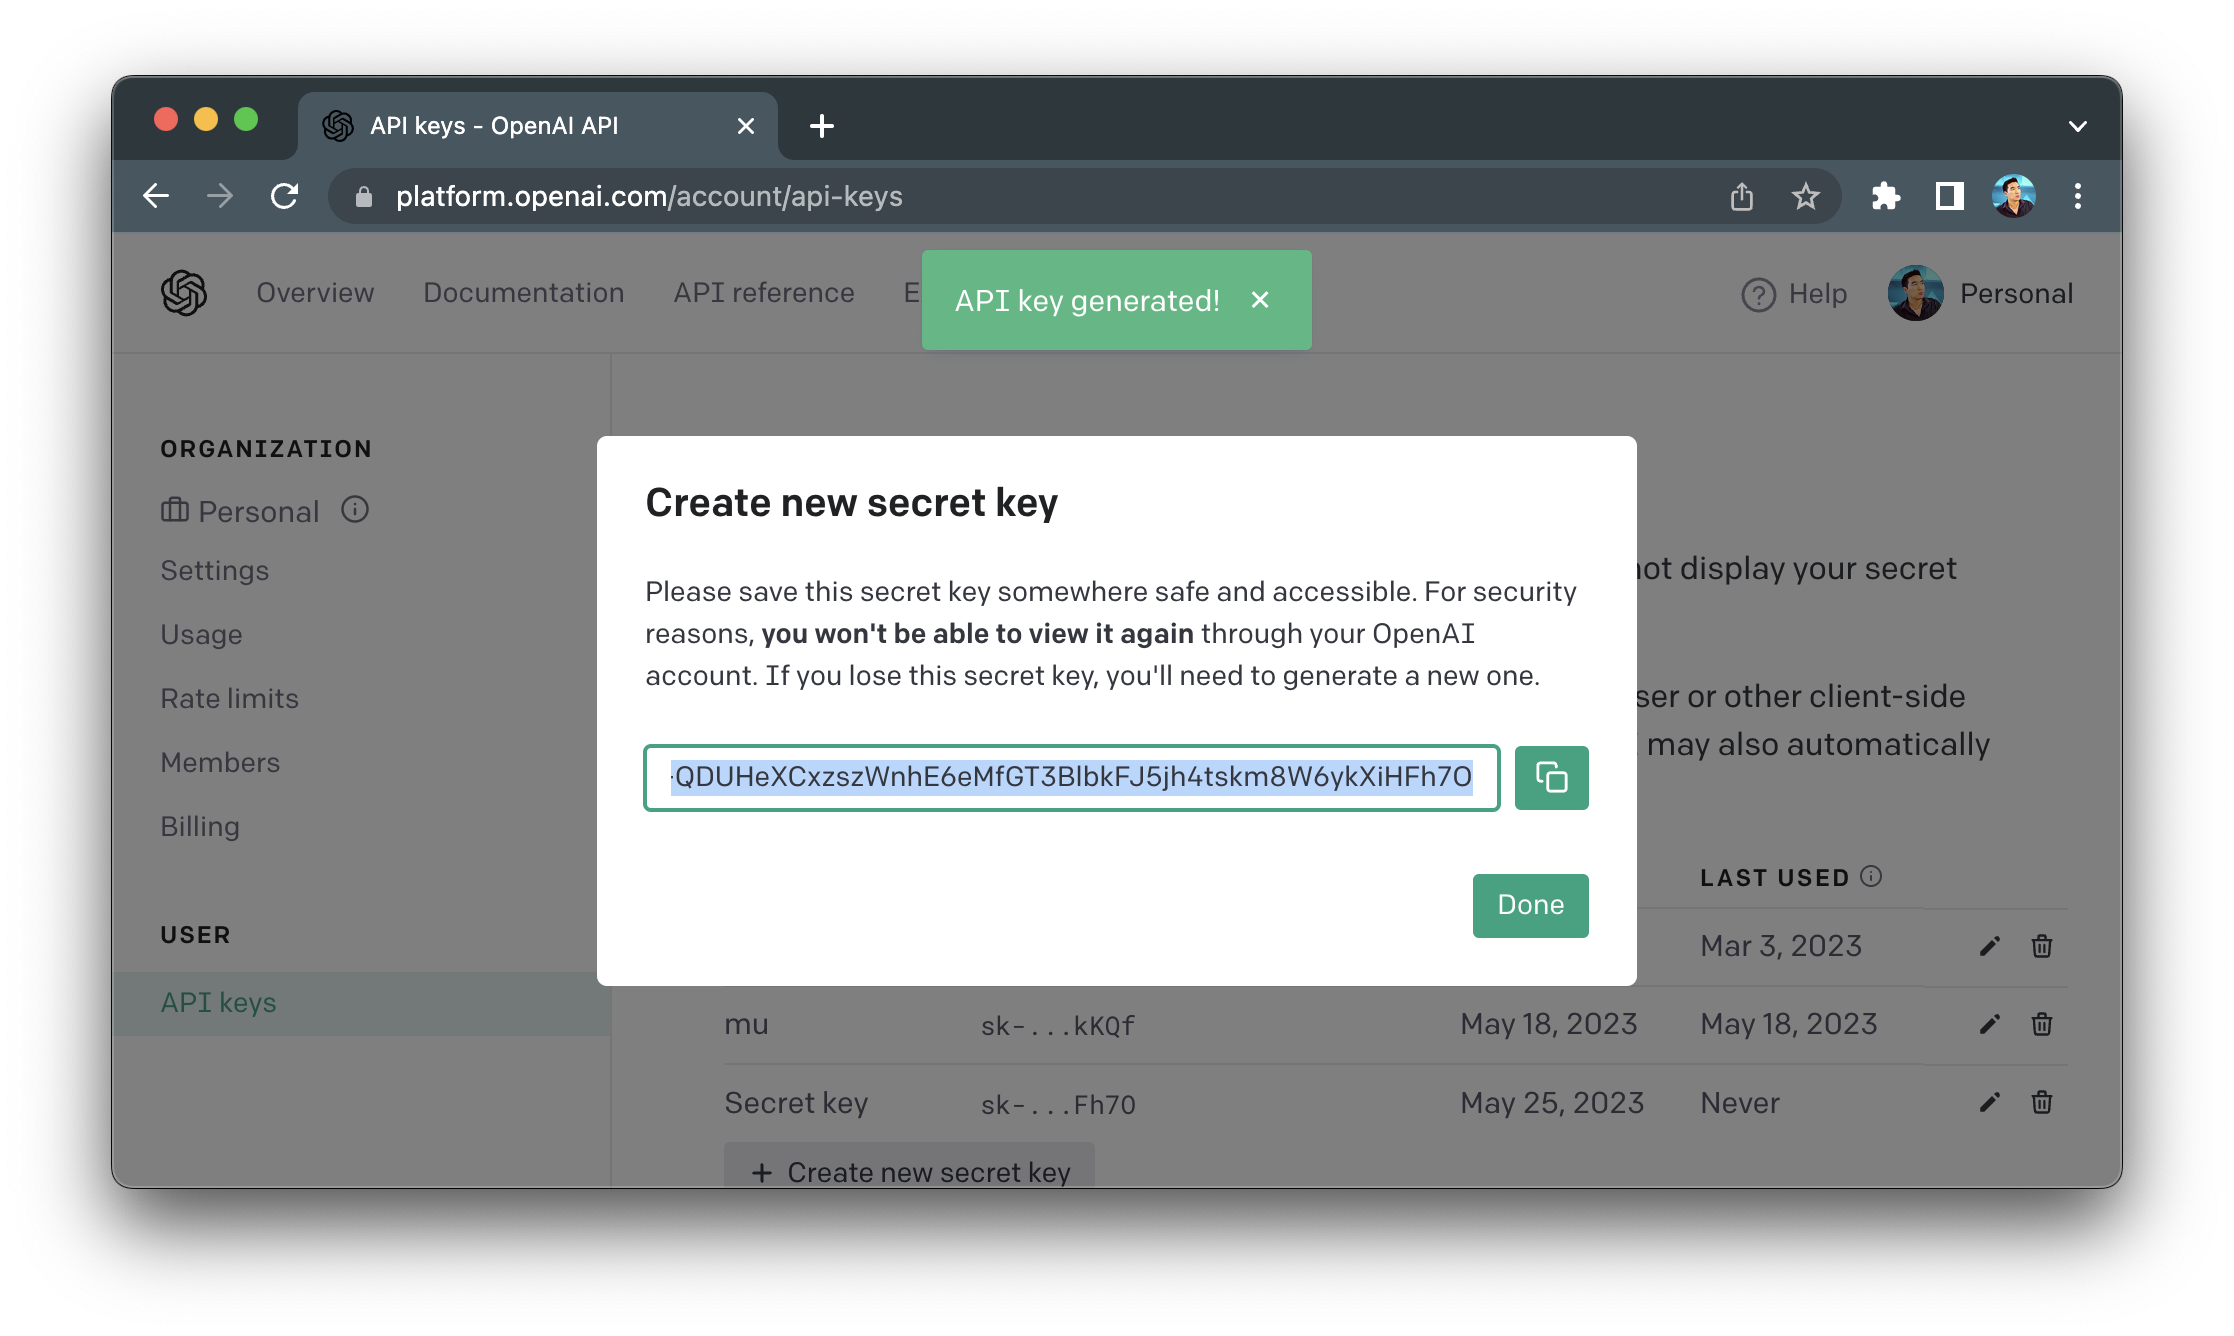

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = ""   # insert your openapi secret key here
# os.environ["HUGGINGFACEHUB_API_TOKEN"] = '' # insert your hugging face hub api token here

LangChain and its Components
1. Models: Choosing from different LLMs and embedding models
2. Prompts: Managing LLM inputs
3. Chains: Combining LLMs with other components
4. Indexes: Accessing external data
5. Memory: Remembering previous conversations
6. Agents: Accessing other tools

In [ ]:
from langchain.llms import OpenAI

llm = OpenAI(model_name="text-davinci-003")

# use the below code for utilising llms hosted on hugging face hub
# from langchain import HuggingFaceHub
# llm = HuggingFaceHub(repo_id="google/flan-t5-xl")


LLMs primary objective is to generate text and we will try to see that by sending prompts to the LLMs.

Pompts are nothing but a way to interact with LLMs.
Most often while sending prompts to LLMs you will not get desired result so one needs to modify their prompt and see which prompt gives best result.

Limitations of infromation which you can get from LLMs:
1. It's limited to the point at which LLM has seen the data

If LLM has not seen the data on which you are trying to ask the question it will start hallucinating.

In [ ]:
# prompt = "Ram has a dog. what animal is Ram's pet?"
# prompt = "how many states are there in India"
# prompt = "tell me a joke"
# prompt = "Ram bought 2 apples. he bought 5 more. How many apples does he have in total?"
prompt = "tell me about features of ......"

In [ ]:
completion = llm(prompt)

In [ ]:
print(completion)



Ram has 7 apples in total.


Extracting embeddings from LLMs

In [ ]:
from langchain.embeddings import OpenAIEmbeddings
embeddings = OpenAIEmbeddings()

# from langchain.embeddings import HuggingFaceEmbeddings
# embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

In [ ]:
text = "Ram bought 2 apples. he bought 5 more. How many apples does he have in total?"

In [ ]:
text_embedding = embeddings.embed_query(text)

In [ ]:
print(text_embedding)

[-0.001937986584380269, -0.005448155105113983, 0.010827818885445595, -0.018803918734192848, -0.006905147340148687, 0.007534020114690065, -0.029513433575630188, -0.015591062605381012, -0.026898318901658058, -0.016960885375738144, -0.0017356264870613813, 0.018480142578482628, -0.021630732342600822, -0.005488627124577761, -0.009806678630411625, 0.029065128415822983, 0.013511424884200096, -0.009389505721628666, 0.006027216091752052, -0.016275973990559578, -0.02377263456583023, 0.0008561386493965983, -0.006830429658293724, -0.003614461747929454, 0.01037951372563839, -0.007048355881124735, 0.02664926089346409, 0.0018196838209405541, 0.034843284636735916, -0.017284661531448364, 0.03596404939889908, -0.04042219743132591, -0.013735577464103699, -0.0175586249679327, -0.03180477395653725, -0.002423650585114956, 0.00474145170301199, 0.014071806333959103, 0.025628121569752693, -0.019750339910387993, 0.012963496148586273, 0.01667446829378605, -0.01004951074719429, 0.014196335338056087, -0.0151427574

Prompt Templates

It takes quite a bit of tweaking of the prompt until you get the desired output from an LLM. This process is called prompt engineering.

Below prompt can be viewed as a zero shot problem setting, where you hope the LLM was trained on enough relevant data to provide a satisfactory response.

In [ ]:
from langchain import PromptTemplate

template = "suggest a good name for a company that makes {product}"

prompt = PromptTemplate(
    input_variables=['product'],
    template=template
)

In [ ]:
prompt.format(product='premium shoes')

'suggest a good name for a company that makes premium shoes'

Another trick to improve the LLM's output is to add a few examples in the prompt and make it a few shot problem setting.

So it's more like the context and detail you will provide to LLM the better it will perform.

In [ ]:
from langchain import PromptTemplate, FewShotPromptTemplate

examples = [
    {"word": "angry", "synonym": "annoyed"},
    {"word": "short", "synonym": "dwarf"}
]

example_template = """
Word: {word}
Synonym: {synonym}\n
"""

example_prompt = PromptTemplate(
    input_variables=["word", "synonym"],
    template=example_template
)

few_shot_prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    prefix="Give the synonym of every input",
    suffix="Word: {input}\nSynonym:",
    input_variables=["input"],
    example_separator="\n",
)


In [ ]:
few_shot_prompt.format(input="big")

'Give the synonym of every input\n\nWord: angry\nSynonym: annoyed\n\n\n\nWord: short\nSynonym: dwarf\n\n\nWord: big\nSynonym:'

Chaining

In [ ]:
from langchain.chains import LLMChain

# chain = LLMChain(llm=llm, prompt=prompt)

# chain.run("premium shoes")

chain = LLMChain(llm=llm, prompt=few_shot_prompt)
chain.run(input="handsome")

' attractive'

' attractive'

Ouput of first input as another input for the LLM

In [ ]:
from langchain.chains import SimpleSequentialChain

second_prompt = PromptTemplate(
    input_variables=["company_name"],
    template="write a catchphrase for the following company: {company_name}"
)

chain_two = LLMChain(llm=llm, prompt=second_prompt)

complete_chain = SimpleSequentialChain(chains=[chain, chain_two], verbose=True)

catch_phrase = complete_chain.run("Premium Shoes")

# AutoGPT



> Entering new  chain...
 High-Quality Shoes


"Step into Style with High-Quality Shoes!"

> Finished chain.


Accessing External Data

In [ ]:
!pip install youtube-transcript-api
!pip install pytube

In [ ]:
from langchain.document_loaders import YoutubeLoader

loader = YoutubeLoader.from_youtube_url("https://www.youtube.com/watch?v=dQw4w9WgXcQ")

documents = loader.load()

In [ ]:
!pip install faiss-cpu
!pip install tiktoken

In [ ]:
from langchain.vectorstores import FAISS

db = FAISS.from_documents(documents, embeddings)

document (in this case, a video) is now stored as embeddings in a vector store.

Now this data can be used to do a variety of things.

So lets use it for question answering task with an information retriever

The is just an example but you can use this as an example with your say companies data or audio files which then can be used to do question answering.

In [ ]:
from langchain.chains import RetrievalQA

retriever = db.as_retriever()

qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    return_source_documents=True
)

query = "What am I never going to do?"

result = qa({"query": query})

print(result['result'])

 I'm never going to say goodbye, make you cry, or let you down.


Because LLMs can hallucinate on tasks they can't accomplish on their own, we need to give them access to supplementary tools such as seach(Google Search), calculators(Python REPL or Wolfram Alpha), looksups(wikipedia), etc.

In [ ]:
!pip install wikipedia

In [ ]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.agents import AgentType

tools = load_tools(["wikipedia", "llm-math"], llm=llm)
agent = initialize_agent(tools,
                         llm,
                         agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
                         verbose=True)


agent.run("When was Barack Obama born? How old was he in 2022?")



> Entering new  chain...
 I can use Wikipedia to find the answer. 
Action: Wikipedia
Action Input: Barack Obama
Observation: Page: Barack Obama
Summary: Barack Hussein Obama II ( (listen) bə-RAHK hoo-SAYN oh-BAH-mə; born August 4, 1961) is an American politician who served as the 44th president of the United States from 2009 to 2017. A member of the Democratic Party, he was the first African-American  president of the United States. Obama previously served as a U.S. senator representing Illinois from 2005 to 2008 and as an Illinois state senator from 1997 to 2004, and worked as a civil rights lawyer and university lecturer. 
Obama was born in Honolulu, Hawaii. After graduating from Columbia University in 1983, he worked as a community organizer in Chicago. In 1988, he enrolled in Harvard Law School, where he was the first black president of the Harvard Law Review. After graduating, he became a civil rights attorney and an academic, teaching constitutional law at the University of Chi

'Barack Obama was born on August 4, 1961, and was 60 years old in 2022.'

Instruction based tuning for LLMs

This required mainly because LLMs can be considered as a person who has read many books but don't know what do with that knowledge.

So tuning LLMs on instructions allows them to do specific tasks

Which can be in lets say question asnwer pair or anything else depending on the use case.